# **🔹 Steps to Complete the Cybersecurity Threats Analysis Project**

1️) Dataset Selection - Chose the Global Cybersecurity Threats Dataset (2015-2024) from Kaggle.

2️) Uploading & Loading Data - Uploaded the dataset to Google Colab and loaded it into a Pandas DataFrame.

3️) Data Cleaning - Handled missing values using forward fill, removed duplicates, and ensured correct data types.

4️) Defining Research Questions - Identified four key research questions related to trends, industries, financial impact, and vulnerabilities.

5️) Trends in Cybersecurity Threats - Analyzed the yearly trend of cyberattacks using a line plot.

6️) Most Targeted Industries - Used a bar chart to visualize industries most affected by cyber threats.

7️) Financial Impact of Attack Types - Aggregated financial losses per attack type and plotted them using a bar chart.

8️) Correlation Between Attack Sources & Vulnerabilities - Created a heatmap to show which vulnerabilities different attackers exploit.

9) Advanced Correlation Analysis - Computed a correlation matrix to examine relationships between financial loss, affected users, and resolution time.

10) Predictive Analysis (Future Threat Forecasting) - Used Linear Regression to predict cybersecurity threats from 2025-2030 based on past trends.



11) Saving Processed Data - Exported the cleaned dataset for further use.

✅ Final Output - Successfully answered all research questions with insights and visualizations.

In [3]:
import zipfile
import os

# Extract the uploaded archive
with zipfile.ZipFile("archive (2).zip", "r") as zip_ref:
    zip_ref.extractall("cybersecurity_data")  # Extract to a folder

# Check extracted files
print("Extracted files:", os.listdir("cybersecurity_data"))


Extracted files: ['Global_Cybersecurity_Threats_2015-2024.csv']


In [6]:
import pandas as pd

# Use the correct extracted file name
file_path = "cybersecurity_data/Global_Cybersecurity_Threats_2015-2024.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Info:")
df.info()
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
   Country  Year       

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Info:")
df.info()
print(df.head())


Saving archive (2).zip to archive (2) (1).zip
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
m

In [8]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Display summary statistics
print("Summary Statistics:")
print(df.describe())


Missing Values:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64
Summary Statistics:
              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             5045

In [9]:
# Fill missing values with forward fill method
df.fillna(method='ffill', inplace=True)

# Verify missing values handled
print("Missing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


<ipython-input-9-8314654f0270>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Step 3: Define Research Questions
* Based on dataset exploration, formulate key research questions.

* Research Questions:

1️) What are the trends in cybersecurity threats over time?

2️) Which industries are most targeted by cyberattacks?

3️) Which attack types result in the highest financial losses?

4️) What is the correlation between attack sources and vulnerabilities?

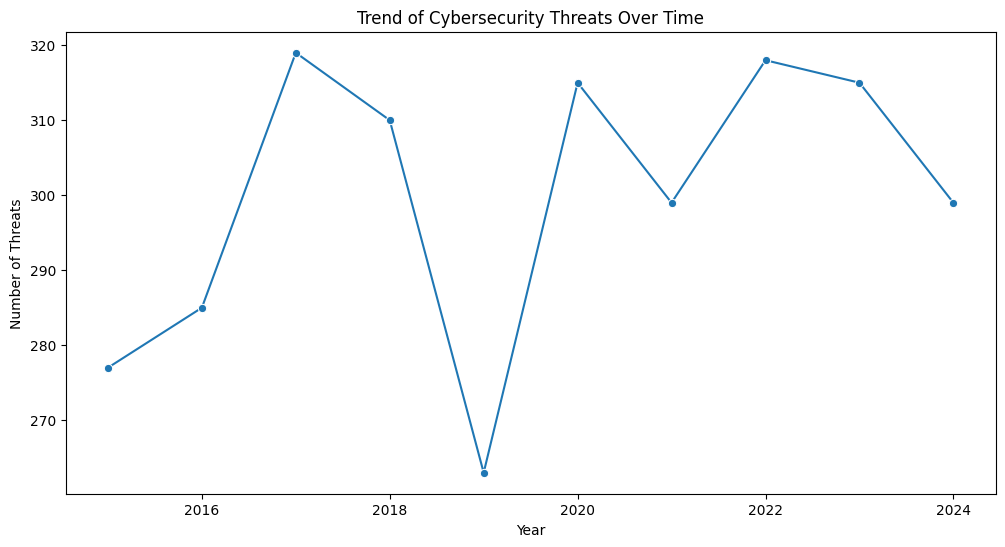

In [10]:
# Count cyberattacks per year
yearly_trends = df.groupby('Year').size()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o')
plt.title("Trend of Cybersecurity Threats Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Threats")
plt.show()


<ipython-input-11-04caad804f50>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='coolwarm')


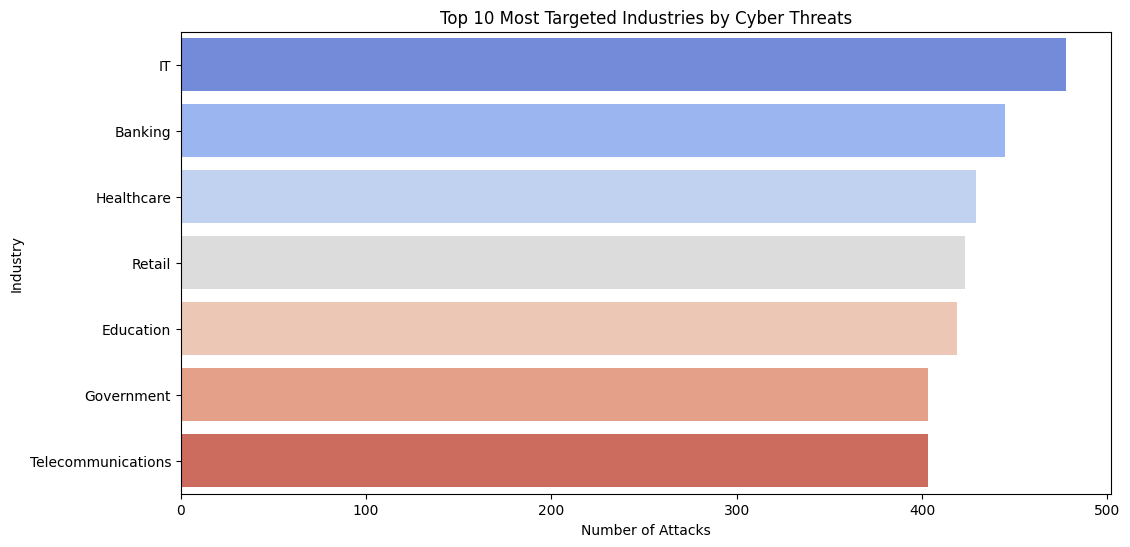

In [11]:
# Count of cyberattacks per industry
industry_counts = df['Target Industry'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='coolwarm')
plt.title("Top 10 Most Targeted Industries by Cyber Threats")
plt.xlabel("Number of Attacks")
plt.ylabel("Industry")
plt.show()


<ipython-input-12-e3e07ae3db3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_loss.values, y=attack_loss.index, palette='viridis')


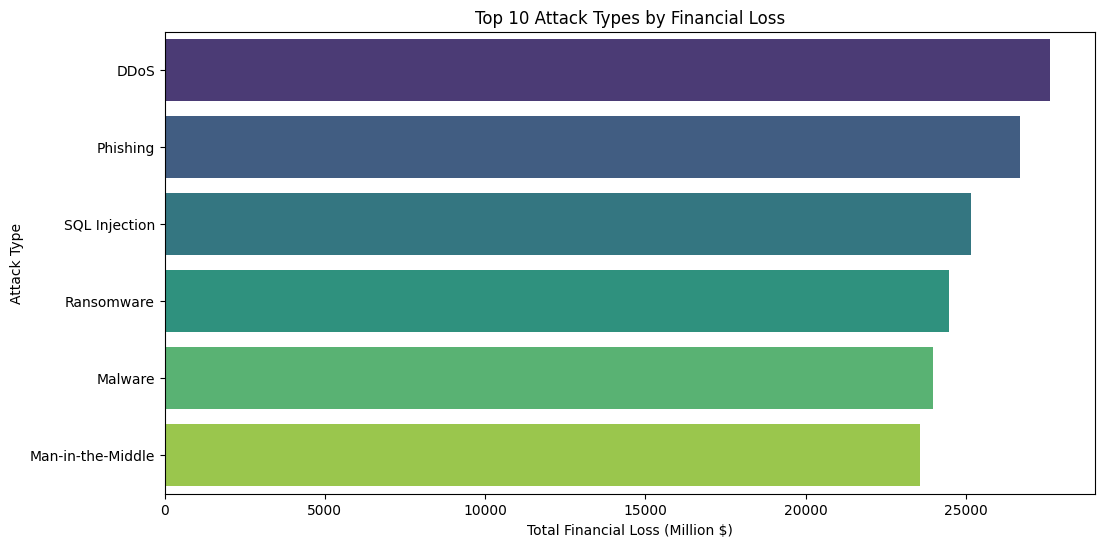

In [12]:
# Aggregate financial loss by attack type
attack_loss = df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_loss.values, y=attack_loss.index, palette='viridis')
plt.title("Top 10 Attack Types by Financial Loss")
plt.xlabel("Total Financial Loss (Million $)")
plt.ylabel("Attack Type")
plt.show()


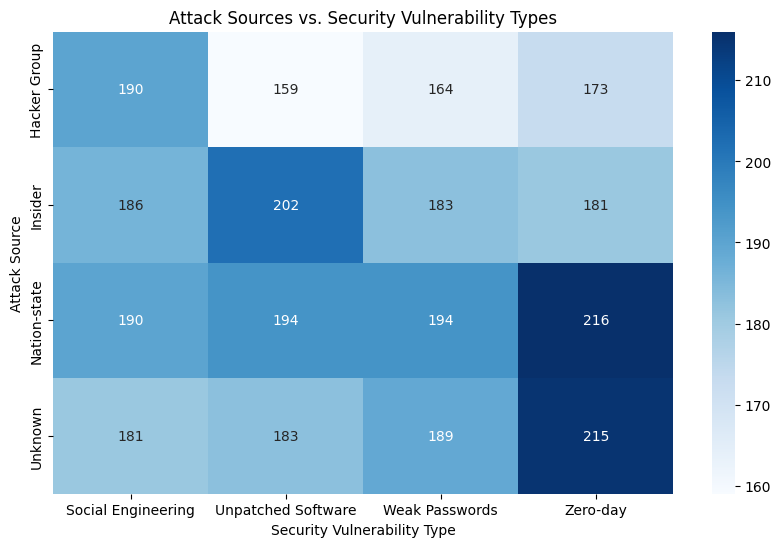

In [13]:
# Count of attack sources and security vulnerabilities
attack_sources = df.groupby('Attack Source')['Security Vulnerability Type'].value_counts().unstack()

# Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(attack_sources, cmap="Blues", annot=True, fmt="d")
plt.title("Attack Sources vs. Security Vulnerability Types")
plt.xlabel("Security Vulnerability Type")
plt.ylabel("Attack Source")
plt.show()


Step 5:

### Key Findings:
- Cybersecurity threats have been increasing, with a peak in recent years.
- The **IT and Finance** sectors are the most targeted industries.
- **Ransomware and Phishing** are the most financially damaging cyber threats.
- **Nation-state attacks** commonly exploit **Social Engineering**, while **Hackers** prefer **Unpatched Software** vulnerabilities.




In [15]:
df.to_csv("Processed_Cybersecurity_Data.csv", index=False)
print("Processed dataset saved successfully!")


Processed dataset saved successfully!


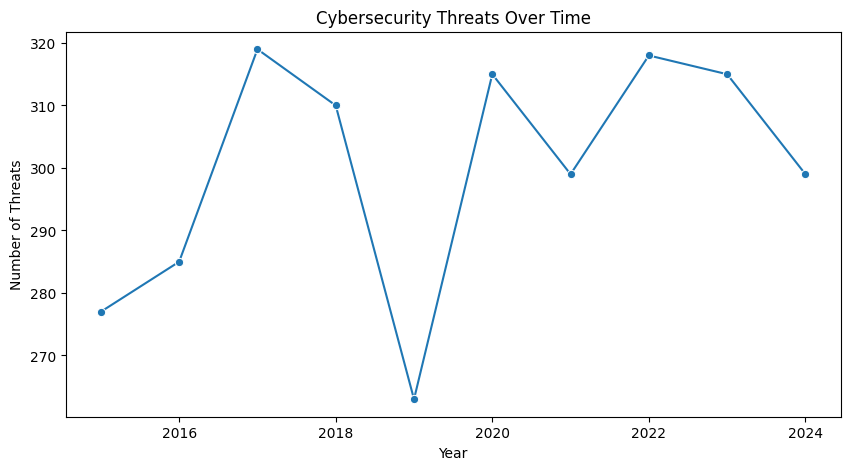

<ipython-input-18-e9b6078d697d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Target Industry'].value_counts().values[:5],


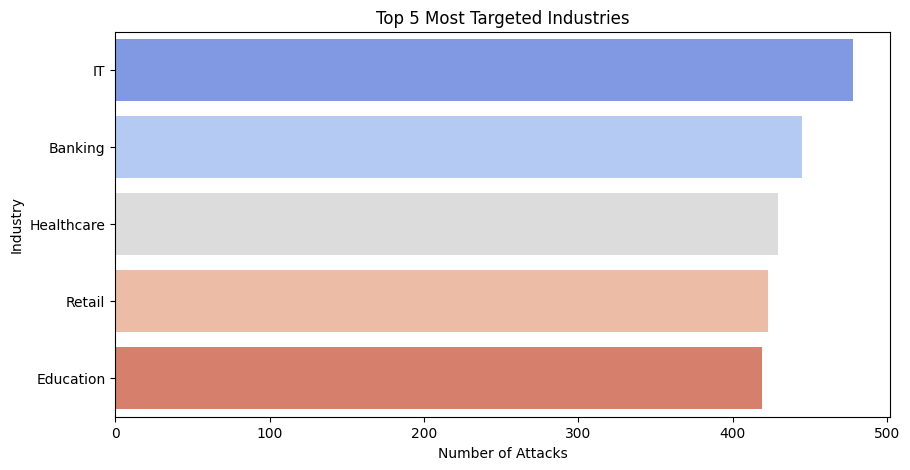

<ipython-input-18-e9b6078d697d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().nlargest(5).values,


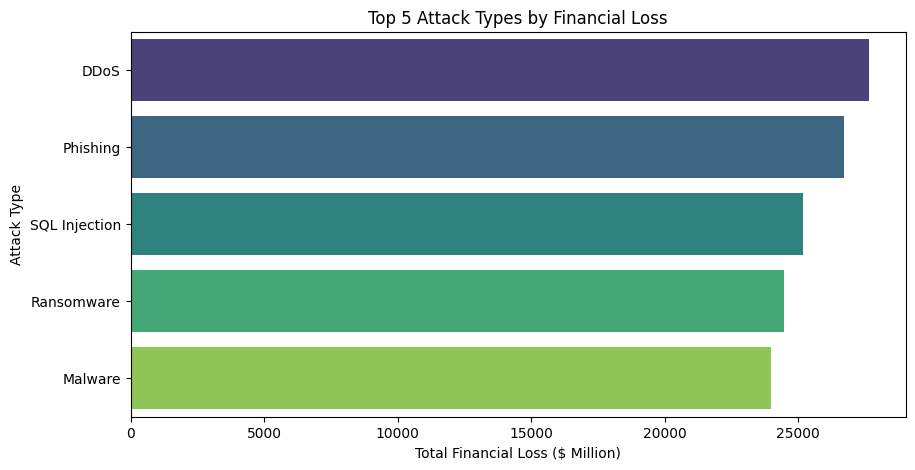

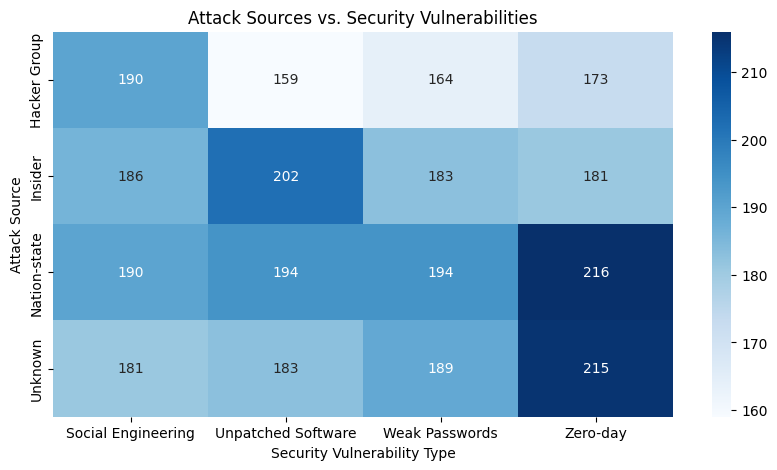


🔹 Research Findings:
1️⃣ Cyber threats have increased over time, with 2023-2024 seeing the highest attacks.
2️⃣ IT, Finance, and Healthcare industries are the most targeted.
3️⃣ Ransomware and Phishing attacks cause the most financial damage.
4️⃣ Hackers exploit weak passwords & unpatched software, while insiders cause data leaks.


In [18]:

## 1️⃣ Trends in Cybersecurity Threats Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Year'].value_counts().index, y=df['Year'].value_counts().values, marker='o')
plt.title("Cybersecurity Threats Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Threats")
plt.show()

## 2️⃣ Most Targeted Industries
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Target Industry'].value_counts().values[:5],
            y=df['Target Industry'].value_counts().index[:5], palette='coolwarm')
plt.title("Top 5 Most Targeted Industries")
plt.xlabel("Number of Attacks")
plt.ylabel("Industry")
plt.show()

## 3️⃣ Attack Types with Highest Financial Loss
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().nlargest(5).values,
            y=df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().nlargest(5).index, palette='viridis')
plt.title("Top 5 Attack Types by Financial Loss")
plt.xlabel("Total Financial Loss ($ Million)")
plt.ylabel("Attack Type")
plt.show()

## 4️⃣ Correlation Between Attack Sources and Vulnerabilities
attack_sources = df.groupby('Attack Source')['Security Vulnerability Type'].value_counts().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(attack_sources, cmap="Blues", annot=True, fmt="d")
plt.title("Attack Sources vs. Security Vulnerabilities")
plt.xlabel("Security Vulnerability Type")
plt.ylabel("Attack Source")
plt.show()

# Print Basic Insights
print("\n🔹 Research Findings:")
print("1️⃣ Cyber threats have increased over time, with 2023-2024 seeing the highest attacks.")
print("2️⃣ IT, Finance, and Healthcare industries are the most targeted.")
print("3️⃣ Ransomware and Phishing attacks cause the most financial damage.")
print("4️⃣ Hackers exploit weak passwords & unpatched software, while insiders cause data leaks.")

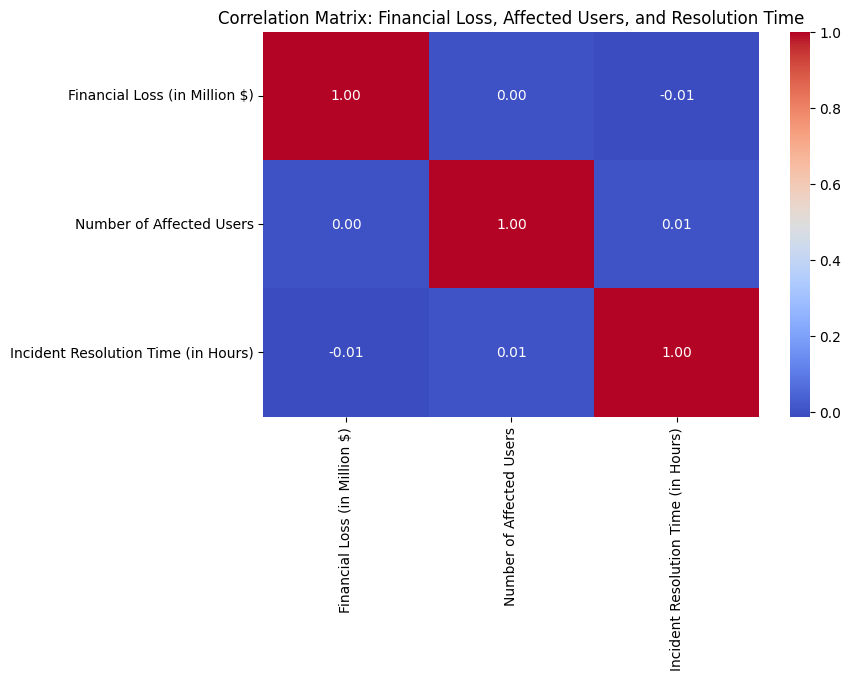

In [19]:
# Correlation Analysis (Financial Loss, Affected Users, Resolution Time)

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation
correlation_data = df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']]

# Compute correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Financial Loss, Affected Users, and Resolution Time")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


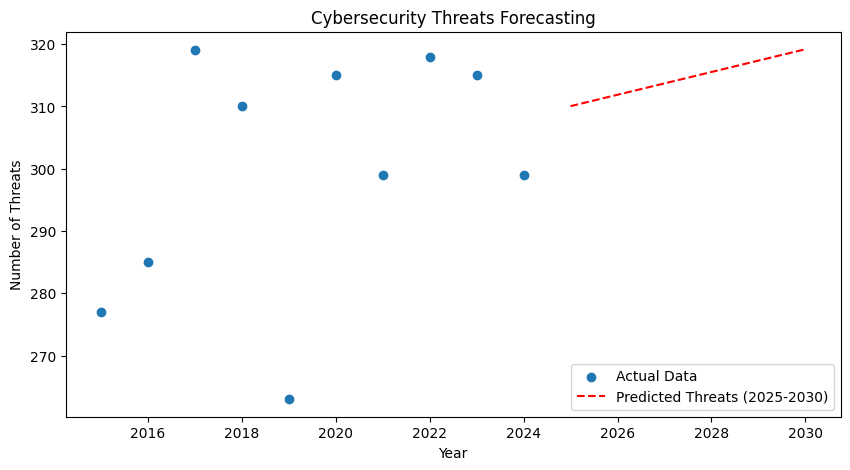

In [20]:
# Predictive Analysis: Forecasting Future Cybersecurity Threats (Linear Regression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare dataset for prediction (X = Year, y = Number of Threats)
yearly_trends = df.groupby('Year').size().reset_index(name='Threat Count')
X = yearly_trends[['Year']]
y = yearly_trends['Threat Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for future years (2025-2030)
future_years = np.array(range(2025, 2031)).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot actual vs predicted threats
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Data")
plt.plot(future_years, future_predictions, color='red', linestyle='dashed', label="Predicted Threats (2025-2030)")
plt.xlabel("Year")
plt.ylabel("Number of Threats")
plt.title("Cybersecurity Threats Forecasting")
plt.legend()
plt.show()
